## Step 1 Construct features using NLTK

In [1]:
import nltk
from nltk.corpus import stopwords
import string
import json

%matplotlib inline 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from __future__ import division

randomState = np.random.seed(2)


# Import works.json: title, words, sentences of 38 pieces
with open('works_v1028.json', 'r') as f:
    try:
        works = json.load(f)
    # if the file is empty the ValueError will be thrown
    except ValueError:
        works = {}


In [2]:
from nltk import FreqDist

def getFreqDist(words):
    nltk_text = nltk.Text(words)
    
    return FreqDist(nltk_text)


In [3]:
def getCountFrequency(words, freq):
    nltk_text = nltk.Text(words)
    freq_dist = FreqDist(nltk_text)
    
    count = 0
    for key,value in freq_dist.items():
        if value == freq:
            count += 1
    
    return count    

def getHapaxLegomena(words):
    return getCountFrequency(words, 1)



In [4]:
def getDisLegomena(words):
    return getCountFrequency(words, 2)


In [5]:
def getNumberUniqueWords(words):
    return len(getFreqDist(words))


In [6]:
def getWordLengthDistribution(words):
    result = FreqDist()
    for w in words:        
        result[len(w)] += 1
    
    return result

def printFreqDist(freq_dist):
    for key,value in freq_dist.items():
        print (key,value)    


In [7]:
def getSentenceLengthDistribution(sents):
    result = FreqDist()
    for s in sents:        
        result[len(s)] += 1
    
    return result   



In [8]:
def getAverageSentenceLength(words_all, sents):
    
    return len(words_all)/len(sents)


In [9]:
def getPronounDistribution(sents):
    result = FreqDist()
    pronouns = ['I', 'you', 'he', 'she', 'it', 'we', 'you', 'they', 'thou', 'ye']
    for s in sents:
        count = 0
        for p in pronouns:
            count += s.count(p)
        result[count] += 1
    
    return result

In [10]:
def getNumberOfPronoun(words):
    pronouns = ['I', 'you', 'he', 'she', 'it', 'we', 'you', 'they', 'thou', 'ye']
    count = 0
         
    for p in pronouns:
        count += words.count(p)
    
    return count

In [11]:
def getConjunctionDistribution(sents):
    result = FreqDist()
    conjunctions = ['for', 'and', 'nor', 'but', 'or', 'yet', 'so', 'after', 'although', 'as', 'because', 'before', 'if',
                'once', 'since', 'though', 'unless', 'until', 'when', 'where', 'while', 'whether', 'either', 'neither',
                'as', 'than', 'even', 'then', 'lest', 'rather', 'which', 'who', 'why', 'that', 'till']
    for s in sents:
        count = 0
        for c in conjunctions:
            count += s.count(c)
        result[count] += 1
    
    return result


In [12]:
def getNumberOfConjunction(words):
    count = 0
    conjunctions = ['for', 'and', 'nor', 'but', 'or', 'yet', 'so', 'after', 'although', 'as', 'because', 'before', 'if',
                'once', 'since', 'though', 'unless', 'until', 'when', 'where', 'while', 'whether', 'either', 'neither',
                'as', 'than', 'even', 'then', 'lest', 'rather', 'which', 'who', 'why', 'that', 'till']

    for c in conjunctions:
        count += words.count(c)
    
    return count

In [13]:
def getNumberOfComma(text):
    return text.count(",")

def getNumberOfDots(text):
    return text.count(".")

def getNumberOfStringList(words, string_list):
    count = 0
    
    for c in string_list:
        count += words.count(c)
    
    return count

def getNumberOfThe(words):
    string_list = ['a', 'an', 'the']
    
    return getNumberOfStringList(words, string_list)

def getNumberOfIn(words):
    string_list = ['in', 'on', 'to', 'of']
    
    return getNumberOfStringList(words, string_list)

def getNumberOfIs(words):
    string_list = ['is', 'are', 'was', 'were']
    
    return getNumberOfStringList(words, string_list)


In [14]:
# Create a feature table for all acts
# Currently only has some simple features

featureTable = {}

featureTable = {'act': [], 'filename': [], 'HapaxLegomena': [], 'DisLegomena': [], 
                'numberUniqueWords': [], 'averageSentenceLength': [], 'numberOfSentences': [],
                'numberOfPronoun': [], 'numberOfConjunction': [], 'numberOfComma': [], 'numberOfDots': [],
                'numberOfThe': [], 'numberOfIn': [], 'numberOfIs': []}


for act, content in works.items():
    words_nonStemmed = content['words_nonStemmed']
    words_all = content['words_all']
    sentences = content['sentences']
    # Normalize by number of all words
    normalizer = len(words_all)
    featureTable['act'].append(act)
    featureTable['filename'].append(content['filename'])
    featureTable['HapaxLegomena'].append(getHapaxLegomena(words_nonStemmed)/normalizer)
    featureTable['DisLegomena'].append(getDisLegomena(words_nonStemmed)/normalizer)
    featureTable['numberUniqueWords'].append(getNumberUniqueWords(words_nonStemmed)/normalizer)
    featureTable['averageSentenceLength'].append(getAverageSentenceLength(words_all, sentences))
    featureTable['numberOfSentences'].append(len(sentences))
    featureTable['numberOfPronoun'].append(getNumberOfPronoun(words_all)/normalizer)
    featureTable['numberOfConjunction'].append(getNumberOfConjunction(words_all)/normalizer)
    featureTable['numberOfComma'].append(getNumberOfComma(content['text'])/normalizer)
    featureTable['numberOfDots'].append(getNumberOfDots(content['text'])/normalizer)
    featureTable['numberOfThe'].append(getNumberOfThe(words_all)/normalizer)
    featureTable['numberOfIn'].append(getNumberOfIn(words_all)/normalizer)
    featureTable['numberOfIs'].append(getNumberOfIs(words_all)/normalizer)

print(len(featureTable['act']))


df = pd.DataFrame(featureTable)
df.set_index(['act'], inplace=True)
df.head()

218


,DisLegomena,HapaxLegomena,averageSentenceLength,filename,numberOfComma,numberOfConjunction,numberOfDots,numberOfIn,numberOfIs,numberOfPronoun,numberOfSentences,numberOfThe,numberUniqueWords
act,,,,,,,,,,,,,
KING RICHARD III ACT II.,0.027915,0.113378,11.941026,28.txt,0.078591,0.091690,0.066566,0.044879,0.018252,0.042731,390,0.035431,0.179944
A MIDSUMMER NIGHT'S DREAM ACT1596,0.074510,0.282353,85.000000,24.txt,0.141176,0.070588,0.015686,0.066667,0.019608,0.003922,3,0.050980,0.380392
CYMBELINE ACT I.,0.028466,0.104161,12.015337,7.txt,0.061654,0.089992,0.068930,0.044932,0.016467,0.057059,652,0.040082,0.169007
THE TRAGEDY OF ROMEO AND JULIET ACT I.,0.029456,0.095262,9.776961,29.txt,0.072575,0.076210,0.080221,0.044247,0.017924,0.047882,816,0.041489,0.165079
THE THIRD PART OF KING HENRY THE SIXTH ACT III,0.032854,0.092772,13.044898,14.txt,0.068210,0.095275,0.066802,0.043805,0.015957,0.038955,490,0.032071,0.162234


In [15]:
# Filter out wierd acts, e.g. the beginning of a play

# df = df[df['averageSentenceLength'] < 30]

df.drop(["A MIDSUMMER NIGHT'S DREAM ACT1596","ALLS WELL THAT ENDS WELL ACT1603", "AS YOU LIKE IT ACT1601", 
              "CYMBELINE ACT1609","KING HENRY THE EIGHTH ACT1611","KING JOHN ACT1597","KING RICHARD III ACT1593",
             "KING RICHARD THE SECOND ACT1596", "LOVE'S LABOUR'S LOST ACT1595", "MEASURE FOR MEASURE ACT1605",
             "MUCH ADO ABOUT NOTHING ACT1599", "SECOND PART OF KING HENRY IV ACT1598", "THE COMEDY OF ERRORS ACT1593",
             "THE FIRST PART OF HENRY THE SIXTH ACT1592", "THE FIRST PART OF KING HENRY THE FOURTH ACT1598",
             "THE HISTORY OF TROILUS AND CRESSIDA ACT1602", "THE LIFE OF KING HENRY THE FIFTH ACT1599",
             "THE LIFE OF TIMON OF ATHENS ACT1608", "THE MERCHANT OF VENICE ACT1597", "THE MERRY WIVES OF WINDSOR ACT1601",
             "THE SECOND PART OF KING HENRY THE SIXTH ACT1591", "THE TAMING OF THE SHREW ACT1594", "THE TEMPEST ACT1612",
             "THE TRAGEDY OF ANTONY AND CLEOPATRA ACT1607", "THE TRAGEDY OF CORIOLANUS ACT1608",
              "THE TRAGEDY OF HAMLET, PRINCE OF DENMARK ACT1604","THE TRAGEDY OF JULIUS CAESAR ACT1599",
             "THE TRAGEDY OF KING LEAR ACT1606", "THE TRAGEDY OF MACBETH ACT1606", 
              "THE TRAGEDY OF OTHELLO, MOOR OF VENICE ACT1605", "THE TRAGEDY OF ROMEO AND JULIET ACT1595",
             "THE TRAGEDY OF TITUS ANDRONICUS ACT1594", "THE TWO GENTLEMEN OF VERONA ACT1595", "THE WINTER'S TALE ACT1611",
             "TWELFTH NIGHT; OR, WHAT YOU WILL ACT1602", "THE THIRD PART OF KING HENRY THE SIXTH ACT1591"], inplace = True)

df_2 = df[['numberUniqueWords', 'averageSentenceLength']]
df_3 = df[['numberUniqueWords', 'averageSentenceLength', 'numberOfPronoun']]
df = df[['HapaxLegomena', 'DisLegomena', 'numberUniqueWords', 
        'averageSentenceLength', 'numberOfPronoun', 'numberOfConjunction', 'numberOfComma', 'numberOfDots',
                'numberOfThe', 'numberOfIn', 'numberOfIs']]

/Users/byan/anaconda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


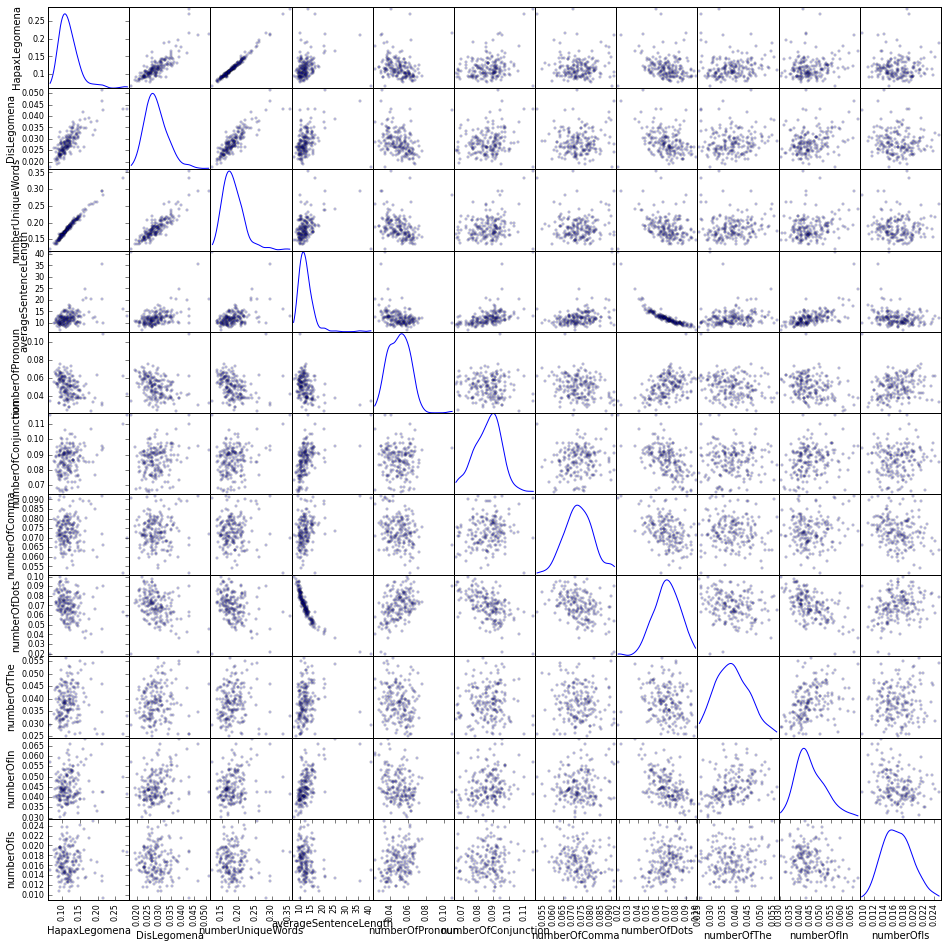

In [16]:
pd.scatter_matrix(df, alpha=0.2, figsize=(16, 16), diagonal='kde')
plt.show()

## Step 2 Construct n-grams using sklearn

In [17]:
title = []
text = []

for act in df.index:
    content = works[act]
    title.append(act)
    text.append(content['text'])


In [18]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from __future__ import print_function

from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn import metrics

from sklearn.cluster import KMeans, MiniBatchKMeans, AffinityPropagation, AgglomerativeClustering, MeanShift, SpectralClustering, DBSCAN, Birch 
import numpy as np

In [19]:
# excluding stop words, n-grams is an input
def getTfidf(ngram_range):
    count_vect = CountVectorizer(ngram_range=ngram_range, stop_words='english')
    X_counts = count_vect.fit_transform(text)

    tfidf_transformer = TfidfTransformer(use_idf=True)
    X_tfidf = tfidf_transformer.fit_transform(X_counts)
    return X_tfidf

In [20]:
def getSVD(X_tfidf, n_components):
    
    svd = TruncatedSVD(n_components = n_components, random_state = randomState)
    lsa = make_pipeline(svd, Normalizer(copy=False))
    X = lsa.fit_transform(X_tfidf)

    explained_variance = svd.explained_variance_ratio_.sum()
    print("Explained variance of the SVD step: {}%".format(
        int(explained_variance * 100)))
    
    return X

    

In [21]:
# Features from n-grams, use fewer components
X_tfidf = getTfidf(ngram_range = (2,4))
X = getSVD(X_tfidf, n_components = 6)
df_ngrams = pd.DataFrame(data=X, index = title, 
                         columns=['n-gram 1st component', 'n-gram 2nd compoent', 'n-gram 3rd', 'n-gram 4th', 'n-gram 5th', 'n-gram 6th',])
df_ngrams.head()

Explained variance of the SVD step: 4%


,n-gram 1st component,n-gram 2nd compoent,n-gram 3rd,n-gram 4th,n-gram 5th,n-gram 6th
KING RICHARD III ACT II.,0.395815,0.501978,-0.558394,-0.302207,0.097423,0.422757
CYMBELINE ACT I.,0.336717,0.074679,-0.270041,-0.294595,-0.606403,0.594652
THE TRAGEDY OF ROMEO AND JULIET ACT I.,0.281111,0.170653,-0.286421,0.143589,0.286274,-0.840980
THE THIRD PART OF KING HENRY THE SIXTH ACT III,0.288718,0.328605,-0.306257,-0.379691,-0.387026,0.648778
MUCH ADO ABOUT NOTHING ACT IV.,0.114724,0.473786,-0.253050,-0.200637,0.198624,-0.786527


## Step 3 Combine n-grams and other features

In [22]:
# Merge all features
df_all = df.join(df_ngrams)
df_all.head()

,HapaxLegomena,DisLegomena,numberUniqueWords,averageSentenceLength,numberOfPronoun,numberOfConjunction,numberOfComma,numberOfDots,numberOfThe,numberOfIn,numberOfIs,n-gram 1st component,n-gram 2nd compoent,n-gram 3rd,n-gram 4th,n-gram 5th,n-gram 6th
act,,,,,,,,,,,,,,,,,
KING RICHARD III ACT II.,0.113378,0.027915,0.179944,11.941026,0.042731,0.091690,0.078591,0.066566,0.035431,0.044879,0.018252,0.395815,0.501978,-0.558394,-0.302207,0.097423,0.422757
CYMBELINE ACT I.,0.104161,0.028466,0.169007,12.015337,0.057059,0.089992,0.061654,0.068930,0.040082,0.044932,0.016467,0.336717,0.074679,-0.270041,-0.294595,-0.606403,0.594652
THE TRAGEDY OF ROMEO AND JULIET ACT I.,0.095262,0.029456,0.165079,9.776961,0.047882,0.076210,0.072575,0.080221,0.041489,0.044247,0.017924,0.281111,0.170653,-0.286421,0.143589,0.286274,-0.840980
THE THIRD PART OF KING HENRY THE SIXTH ACT III,0.092772,0.032854,0.162234,13.044898,0.038955,0.095275,0.068210,0.066802,0.032071,0.043805,0.015957,0.288718,0.328605,-0.306257,-0.379691,-0.387026,0.648778
MUCH ADO ABOUT NOTHING ACT IV.,0.102470,0.025618,0.166514,9.223629,0.057411,0.090348,0.072278,0.080512,0.032022,0.040485,0.021958,0.114724,0.473786,-0.253050,-0.200637,0.198624,-0.786527


## Step 4 Clustering

In [23]:
def getLabels(X, n_clusters = 8, method = 'KMeans'):
    
    if method == 'KMeans':
        cluster = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=500, 
                         n_init=5, random_state = randomState)   
    elif method == 'AffinityPropagation':
        cluster = AffinityPropagation(max_iter=1000)
    elif method == 'AgglomerativeClustering':
        cluster = AgglomerativeClustering(n_clusters=n_clusters)
    elif method == 'Birch':
        cluster = Birch()
    elif method == 'DBSCAN':
        cluster = DBSCAN(random_state = randomState, eps=0.1, min_samples=3)
    elif method == 'SpectralClustering':
        cluster = SpectralClustering(n_clusters=n_clusters)
    elif method == 'MeanShift':
        cluster = MeanShift()
        

    return cluster.fit_predict(X)
        

def printClusters(labels):
    for i in set(labels):
        index = np.squeeze(np.argwhere(labels == i)).tolist()
        print(index)
    
        print(np.array(title)[index])
        print('\n')
        
def print2D(X, x_label, y_label, title, labels):
    plt.figure(figsize = (9,7))
    plt.scatter(X[:,0], X[:,1], c=labels, marker='+', s=100, linewidths=2)
    plt.ylabel(y_label, fontsize=14, fontweight='bold')
    plt.xlabel(x_label, fontsize=14, fontweight='bold')
    plt.title(title, fontsize=14, fontweight='bold')
    
    ax = plt.gca()
    for i in range(len(labels)):
        if labels.tolist().count(labels[i]) <= 3:
            ax.annotate(df_all.index[i], xy=X[i,:], fontweight='bold')
    
    xmin = min(X[:,0])
    xmax = max(X[:,0])
    ymin = min(X[:,1])
    ymax = max(X[:,1])
    
    xrange = xmax - xmin
    yrange = ymax - ymin
    
    xmin = xmin - xrange/10
    xmax = xmax + xrange/10
    
    ymin = ymin - yrange/10
    ymax = ymax + yrange/10
    
    plt.xlim([xmin, xmax])
    plt.ylim([ymin, ymax])
    plt.show()  

In [24]:
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn import metrics
from sklearn.manifold import MDS

def clusterDocuments(X, scaled = False, PCA_X = False, n_clusters = 8, 
                     method = 'KMeans', visualize = 'PCA', verbose = True):
        
    
    if scaled:
        X = preprocessing.scale(X)
        
    if PCA_X:
        X = PCA().fit_transform(X)
        
    if PCA_X:
        X_2D_PCA = X[:, 0:2]
    else: 
        X_2D_PCA = PCA(n_components=2).fit_transform(X)
        X_2D_MDS = MDS(n_components=2).fit_transform(X)
        
    labels = getLabels(X, n_clusters, method)
        
    if visualize == 'PCA':
        print2D(X_2D_PCA, 'PCA 1st component', 'PCA 2nd component', method, labels)
    elif visualize == 'MDS':
        print2D(X_2D_MDS, 'MDS 1st component', 'MDS 2nd component', method, labels)
        
    
    print('Number of clusters: ', len(set(labels)))
    print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels, random_state=randomState))
    
    if verbose:
        printClusters(labels)

def visualizeCovariance(X, scaled = False):
    if scaled:
        X = preprocessing.scale(X)
        title = 'Standardized'
    else:
        title = 'Non-Standardized'
    
    pca = PCA(n_components=None)
    pca.fit(X)
    
    covariance = pca.get_covariance()
    
    
    width = 0.5
    ind = np.arange(len(pca.explained_variance_ratio_))

    plt.figure()
    ax = plt.gca()
    ax.bar(ind, pca.explained_variance_ratio_, width, color='gray')
    plt.ylabel('Explained Variance Ratio')
    plt.xlabel('Components')
    plt.title(title, fontweight='bold')
    plt.show()
    
    fig, ax = plt.subplots()
    heatmap = ax.pcolor(covariance, cmap=plt.cm.Blues, alpha=0.8)
    # Format
    fig = plt.gcf()
    fig.set_size_inches(8, 8)
    # turn off the frame
    ax.set_frame_on(False)
    # put the major ticks at the middle of each cell
    ax.set_yticks(np.arange(covariance.shape[0]) + 0.5, minor=False)
    ax.set_xticks(np.arange(covariance.shape[1]) + 0.5, minor=False)
    # want a more natural, table-like display
    ax.invert_yaxis()
    ax.xaxis.tick_top()
    # Set the labels
    # label source:https://en.wikipedia.org/wiki/Basketball_statistics
    labels = df_all.columns
    # note I could have used nba_sort.columns but made "labels" instead
    ax.set_xticklabels(labels, minor=False)
    ax.set_yticklabels(labels, minor=False)
    # rotate the
    plt.xticks(rotation=90)
    ax.grid(False)
    # Turn off all the ticks
    ax = plt.gca()
    for t in ax.xaxis.get_major_ticks():
        t.tick1On = False
        t.tick2On = False
    for t in ax.yaxis.get_major_ticks():
        t.tick1On = False
        t.tick2On = False
    plt.title(title, fontweight='bold', y=0)
    plt.show()
    

In [25]:
# Cluster only using n-grams as features
# X_tfidf = getTfidf(ngram_range = (2,4))
# X = getSVD(X_tfidf, n_components = 20)
# labels = getLabels(X, n_clusters = 20)
# printClusters(labels)

> By only using n-grams + td-idf + SVD (20 components), acts are grouped mainly according to their topics. Acts of the same play go to the same cluster.

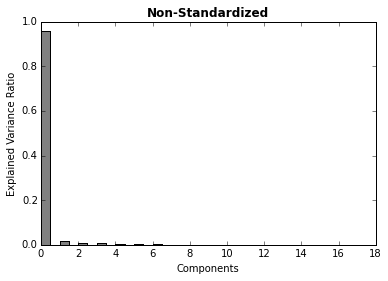

/Users/byan/anaconda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


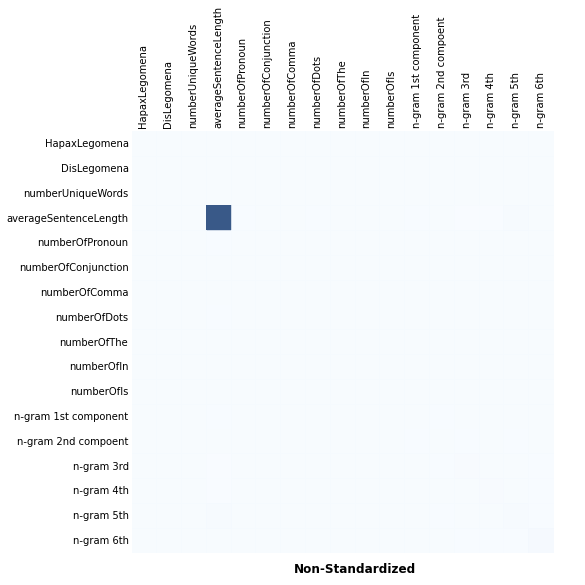

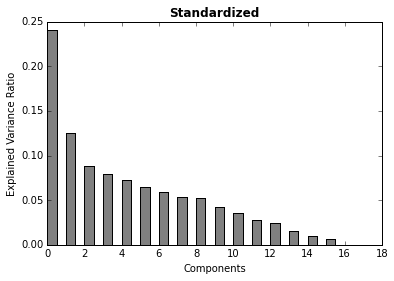

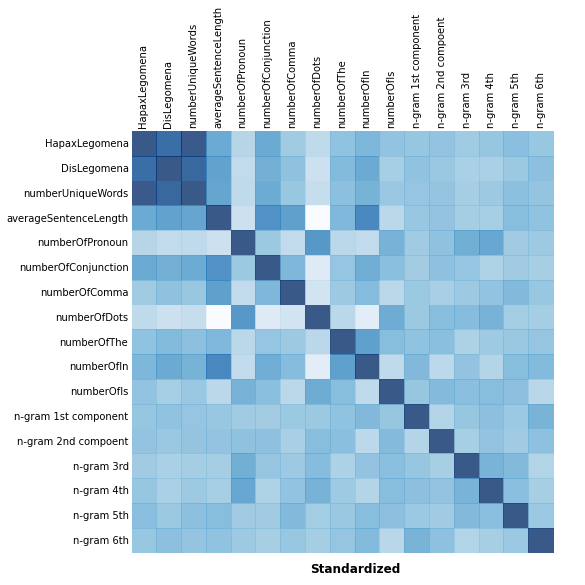

In [26]:
X = df_all.values
visualizeCovariance(X, scaled = False)
visualizeCovariance(X, scaled = True)

### K-Means

In [27]:
# Cluster using all features
X = df_all.values
for n in np.arange(2,30,1):
    clusterDocuments(X, scaled=True, PCA_X = True, n_clusters = n, method = 'KMeans', visualize = 'None', verbose = False)

Number of clusters:  2
Silhouette Coefficient: 0.149
Number of clusters:  3
Silhouette Coefficient: 0.104
Number of clusters:  4
Silhouette Coefficient: 0.094
Number of clusters:  5
Silhouette Coefficient: 0.072
Number of clusters:  6
Silhouette Coefficient: 0.104
Number of clusters:  7
Silhouette Coefficient: 0.105
Number of clusters:  8
Silhouette Coefficient: 0.102
Number of clusters:  9
Silhouette Coefficient: 0.113
Number of clusters:  10
Silhouette Coefficient: 0.104
Number of clusters:  11
Silhouette Coefficient: 0.125
Number of clusters:  12
Silhouette Coefficient: 0.099
Number of clusters:  13
Silhouette Coefficient: 0.122
Number of clusters:  14
Silhouette Coefficient: 0.125
Number of clusters:  15
Silhouette Coefficient: 0.114
Number of clusters:  16
Silhouette Coefficient: 0.124
Number of clusters:  17
Silhouette Coefficient: 0.113
Number of clusters:  18
Silhouette Coefficient: 0.109
Number of clusters:  19
Silhouette Coefficient: 0.117
Number of clusters:  20
Silhouette C

/Users/byan/anaconda/lib/python3.4/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


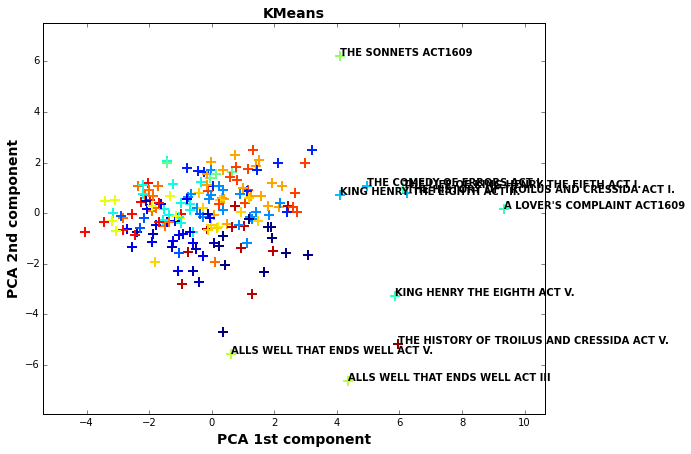

Number of clusters:  20
Silhouette Coefficient: 0.112
[12, 16, 46, 78, 107, 113, 127, 152, 155, 164, 168]
['KING JOHN ACT I. ' 'THE HISTORY OF TROILUS AND CRESSIDA ACT III'
 'KING HENRY THE EIGHTH ACT IV.' "THE WINTER'S TALE ACT I. "
 'THE TEMPEST ACT IV.' 'THE TEMPEST ACT III'
 'ALLS WELL THAT ENDS WELL ACT II.' 'THE TEMPEST ACT V. '
 'THE TRAGEDY OF TITUS ANDRONICUS ACT II.'
 'THE FIRST PART OF HENRY THE SIXTH ACT II.'
 'ALLS WELL THAT ENDS WELL ACT I. ']


[4, 11, 13, 33, 41, 55, 94, 176, 181]
['MUCH ADO ABOUT NOTHING ACT IV.'
 'THE HISTORY OF TROILUS AND CRESSIDA ACT IV.'
 'KING HENRY THE EIGHTH ACT I. ' 'THE TWO GENTLEMEN OF VERONA ACT V. '
 'CYMBELINE ACT II.' 'THE TRAGEDY OF JULIUS CAESAR ACT IV.'
 'ALLS WELL THAT ENDS WELL ACT V S' 'THE TRAGEDY OF JULIUS CAESAR ACT I. '
 'THE TWO GENTLEMEN OF VERONA ACT II.']


[7, 38, 40, 48, 50, 81, 85, 95, 98, 104, 132, 146, 154, 157, 158, 159, 175]
['THE LIFE OF TIMON OF ATHENS ACT I. ' 'THE TRAGEDY OF KING LEAR ACT IV.'
 'THE TRAGEDY OF KI

/Users/byan/anaconda/lib/python3.4/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


In [28]:
X = df_all.values
clusterDocuments(X, scaled = True, PCA_X = True, n_clusters = 20, method = 'KMeans', visualize = 'PCA', verbose = True)

> By adding the features of average sentence length, number of unique words normalized by total number of words, fequency of conjunctions, and etc., acts are clustered according to the writing style (need to be verified by visualization).

### Affinity Propagation

In [29]:
print('No mormalization')
clusterDocuments(X, scaled = False, PCA_X=False, method = 'AffinityPropagation', visualize = 'None', verbose = False)
print('Normalize to N(0,1)')
clusterDocuments(X, scaled = True, method = 'AffinityPropagation', visualize = 'None', verbose = False)

No mormalization
Number of clusters:  17
Silhouette Coefficient: 0.242
Normalize to N(0,1)
Number of clusters:  26
Silhouette Coefficient: 0.089


/Users/byan/anaconda/lib/python3.4/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


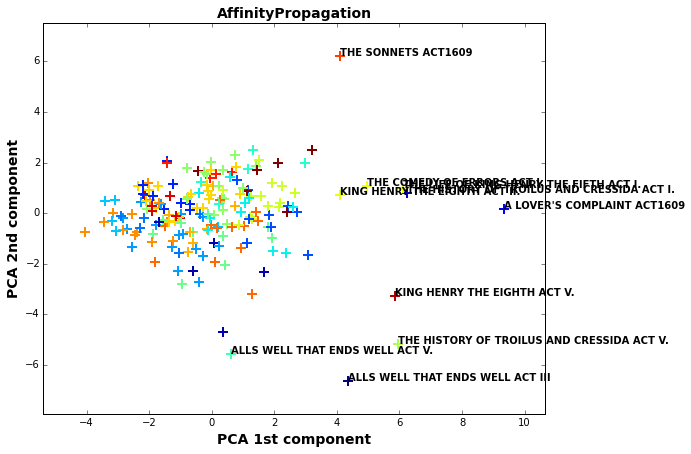

Number of clusters:  26
Silhouette Coefficient: 0.089
8
ALLS WELL THAT ENDS WELL ACT III


[11, 13, 107, 127, 133]
['THE HISTORY OF TROILUS AND CRESSIDA ACT IV.'
 'KING HENRY THE EIGHTH ACT I. ' 'THE TEMPEST ACT IV.'
 'ALLS WELL THAT ENDS WELL ACT II.'
 'THE TRAGEDY OF ROMEO AND JULIET ACT IV.']


22
THE HISTORY OF TROILUS AND CRESSIDA ACT I. 


29
A LOVER'S COMPLAINT ACT1609


[6, 28, 30, 34, 43, 88, 142, 150, 162]
['THE TRAGEDY OF JULIUS CAESAR ACT II.'
 'THE TRAGEDY OF HAMLET, PRINCE OF DENMARK ACT I. '
 "THE WINTER'S TALE ACT IV." "A MIDSUMMER NIGHT'S DREAM ACT III"
 'AS YOU LIKE IT ACT V. ' "THE WINTER'S TALE ACT V. "
 "LOVE'S LABOUR'S LOST ACT V. " 'MEASURE FOR MEASURE ACT II.'
 'THE TRAGEDY OF JULIUS CAESAR ACT III']


[23, 32, 46, 75, 82, 117, 122, 155, 164]
['THE TRAGEDY OF TITUS ANDRONICUS ACT III'
 'THE SECOND PART OF KING HENRY THE SIXTH ACT V. '
 'KING HENRY THE EIGHTH ACT IV.' "A MIDSUMMER NIGHT'S DREAM ACT II."
 "THE WINTER'S TALE ACT III" 'THE TRAGEDY OF TITUS ANDRONICU

/Users/byan/anaconda/lib/python3.4/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


In [30]:
clusterDocuments(X, scaled = True, PCA_X = True, method = 'AffinityPropagation')

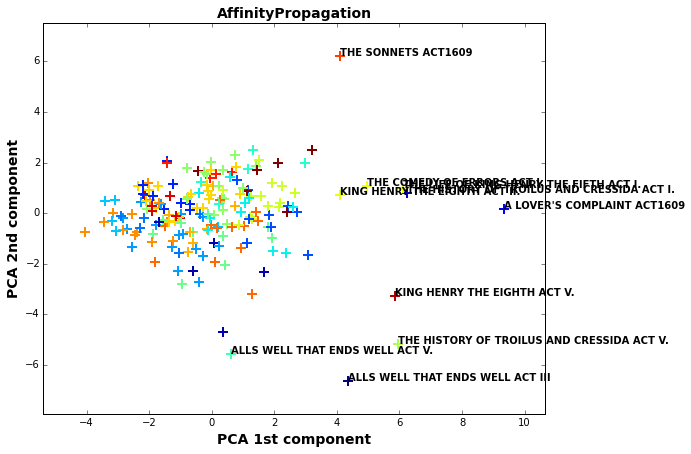

Number of clusters:  26
Silhouette Coefficient: 0.089


/Users/byan/anaconda/lib/python3.4/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


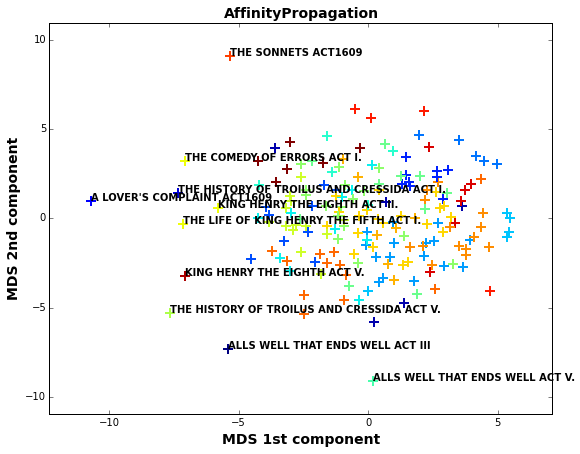

Number of clusters:  26
Silhouette Coefficient: 0.089


In [31]:
clusterDocuments(X, scaled = True, method = 'AffinityPropagation', visualize = 'PCA', verbose = False)
clusterDocuments(X, scaled = True, method = 'AffinityPropagation', visualize = 'MDS', verbose = False)

In [32]:
X = df_all.values
for n in np.arange(2,30,1):
    clusterDocuments(X, scaled=True, PCA_X = True, n_clusters = n, method = 'AgglomerativeClustering', visualize = False, verbose = False)
    

Number of clusters:  2
Silhouette Coefficient: 0.105
Number of clusters:  3
Silhouette Coefficient: 0.101
Number of clusters:  4
Silhouette Coefficient: 0.108
Number of clusters:  5
Silhouette Coefficient: 0.089
Number of clusters:  6
Silhouette Coefficient: 0.094
Number of clusters:  7
Silhouette Coefficient: 0.090
Number of clusters:  8
Silhouette Coefficient: 0.103
Number of clusters:  9
Silhouette Coefficient: 0.110
Number of clusters:  10
Silhouette Coefficient: 0.112
Number of clusters:  11
Silhouette Coefficient: 0.114
Number of clusters:  12
Silhouette Coefficient: 0.116
Number of clusters:  13
Silhouette Coefficient: 0.123
Number of clusters:  14
Silhouette Coefficient: 0.114
Number of clusters:  15
Silhouette Coefficient: 0.115
Number of clusters:  16
Silhouette Coefficient: 0.121
Number of clusters:  17
Silhouette Coefficient: 0.125
Number of clusters:  18
Silhouette Coefficient: 0.126
Number of clusters:  19
Silhouette Coefficient: 0.123
Number of clusters:  20
Silhouette C

/Users/byan/anaconda/lib/python3.4/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


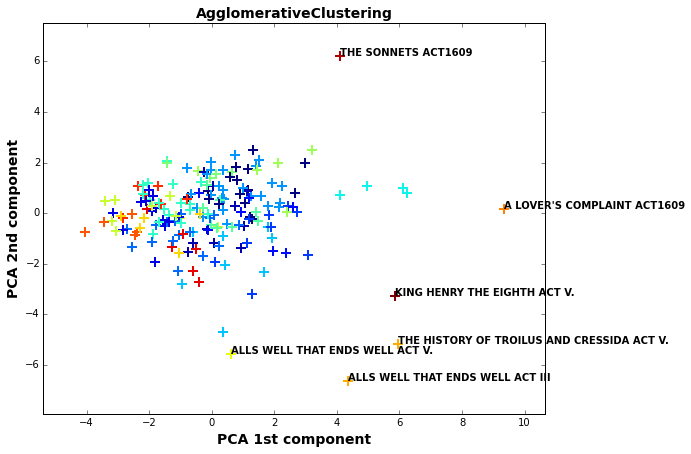

Number of clusters:  23
Silhouette Coefficient: 0.130
[23, 39, 44, 45, 49, 53, 54, 67, 92, 100, 108, 117, 118, 131, 134, 147]
['THE TRAGEDY OF TITUS ANDRONICUS ACT III' 'AS YOU LIKE IT ACT II.'
 'THE FIRST PART OF KING HENRY THE FOURTH ACT III'
 'THE FIRST PART OF KING HENRY THE FOURTH ACT I. '
 'THE TRAGEDY OF TITUS ANDRONICUS ACT IV.' 'KING JOHN ACT II.'
 'THE TRAGEDY OF TITUS ANDRONICUS ACT 1. ' 'KING JOHN ACT III'
 'THE MERCHANT OF VENICE ACT III' 'MEASURE FOR MEASURE ACT I. '
 'THE TEMPEST ACT I. ' 'THE TRAGEDY OF TITUS ANDRONICUS ACT V. '
 'SECOND PART OF KING HENRY IV ACT IV.' 'THE TRAGEDY OF MACBETH ACT I. '
 'THE TRAGEDY OF HAMLET, PRINCE OF DENMARK ACT III'
 'THE FIRST PART OF KING HENRY THE FOURTH ACT V. ']


[11, 17, 36, 37, 42, 64, 90, 135, 159, 173]
['THE HISTORY OF TROILUS AND CRESSIDA ACT IV.'
 'KING RICHARD THE SECOND ACT V. ' 'KING RICHARD THE SECOND ACT II.'
 "LOVE'S LABOUR'S LOST ACT III" 'THE TRAGEDY OF MACBETH ACT II.'
 "A MIDSUMMER NIGHT'S DREAM ACT IV." 'THE MER

/Users/byan/anaconda/lib/python3.4/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


In [33]:
clusterDocuments(X, n_clusters = 23, scaled = True, PCA_X = True, method = 'AgglomerativeClustering')

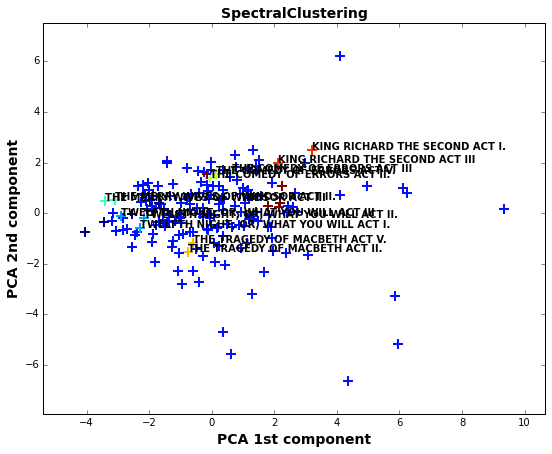

Number of clusters:  8
Silhouette Coefficient: -0.156


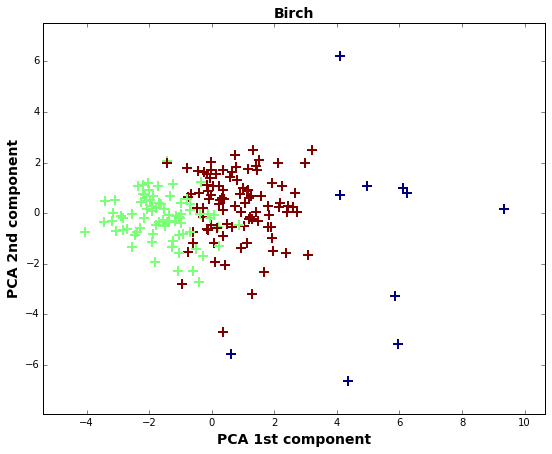

Number of clusters:  3
Silhouette Coefficient: 0.101


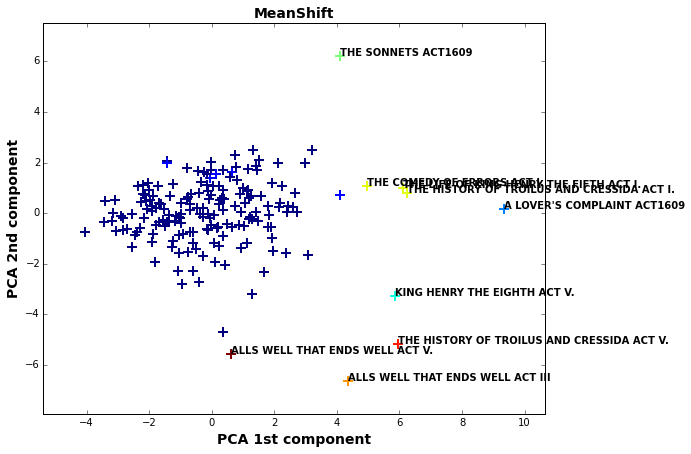

Number of clusters:  9
Silhouette Coefficient: 0.239


/Users/byan/anaconda/lib/python3.4/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


In [34]:
clusterDocuments(X, n_clusters = 8, scaled = True, PCA_X = True, method = 'SpectralClustering', verbose = False)
clusterDocuments(X, scaled = True, PCA_X = True, method = 'Birch', verbose = False)
#clusterDocuments(X, scaled = True, PCA_X = True, method = 'DBSCAN')
clusterDocuments(X, scaled = True, PCA_X = True, method = 'MeanShift', verbose = False)


In [35]:
def print3D(X, x_label, y_label, z_label, title, labels):
    fig = plt.figure(1, figsize=(11, 10))
    plt.clf()
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

    plt.cla()
    
    ax.scatter(X[:, 1], X[:, 0], X[:, 2], c=labels.astype(np.float), s=50)
    ax.dist = 11

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_zlabel(z_label)
    
pca = PCA(n_components=3)
X_3D_PCA = pca.fit_transform(X)

print3D(X_3D_PCA, 'numberUniqueWords', 'averageSentenceLength', 'numberOfPronoun', 'title', labels)

NameError: name 'labels' is not defined